# Deconvolution of 10x Visium single cell data

## 1. Load libraries and h5ad file

In [7]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/thorsten/.pyenv/versions/Spatial_Transcriptomics/lib/python3.13/site-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/Users/thorsten/.pyenv/versions/Spatial_Transcriptomics/lib/python3.13/site-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/Users/thorsten/.pyenv/versions/Spatial_Transcriptomics/lib/python3.13/site-packages/scanpy/readwrite.py:16: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/Users/thorsten/.pyenv/versions/Spatial_Transcriptomics/lib/python3.13/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed 

In [8]:
# Check the path you are working from
!pwd

/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python/scripts


In [9]:
# Change the path for easier navigation through the project
%cd '/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python/'

/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python


In [10]:
# load preprocessed data
adata = sc.read_h5ad('./results/preprocessed.h5ad')

## 2.1  Unsupervised Deconvolution using Tangram

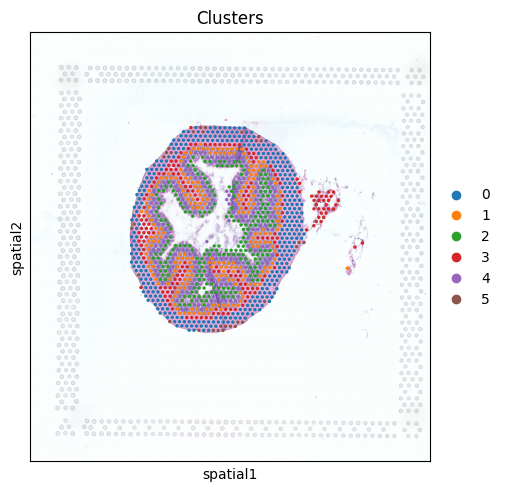

In [11]:
# Let's shortly plot our image again
adata.uns.pop('Clusters_colors')
sq.pl.spatial_scatter(adata, color="Clusters")


In [22]:
markers = sc.get.rank_genes_groups_df(adata, adata.obs['Clusters'].unique())
markers = markers[['group','names']]
markers = list(np.unique(markers['names'].values))

In [27]:
len(markers)

13081